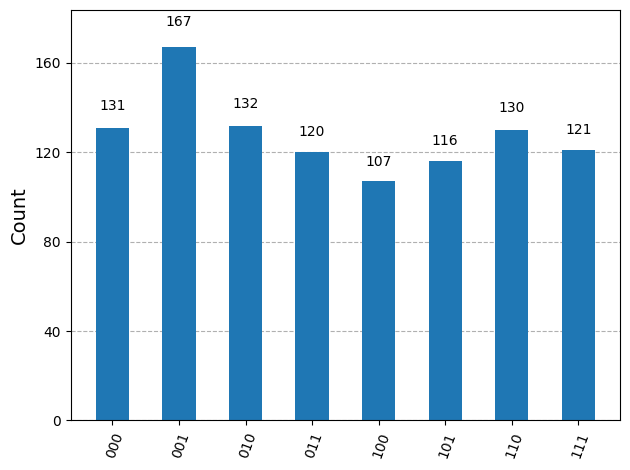

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

# Create a quantum circuit with 3 qubits (for teleportation) and 3 classical bits (to measure the outcome).
qc = QuantumCircuit(3, 3)

# Step 1: Create the entangled pair between qubit 1 and qubit 2
qc.h(1)  # Apply the Hadamard gate to qubit 1
qc.cx(1, 2)  # Apply a CNOT gate with qubit 1 as control and qubit 2 as target

# Step 2: Prepare the initial state to be teleported on qubit 0
# For this example, let's simply apply a Hadamard gate to create a superposition
qc.h(0)

# Teleportation algorithm
# Step 3: Apply the teleportation protocol
qc.barrier()
qc.cx(0, 1)  # CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0)  # Hadamard gate on qubit 0
qc.barrier()

# Measurement of qubits 0 and 1
qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1 and store the result in classical bits 0 and 1

# Conditional operations on qubit 2 based on the measurement results
qc.cx(1, 2)  # CNOT gate with qubit 1 as control and qubit 2 as target, conditioned on the classical bit
qc.cz(0, 2)  # Controlled-Z gate with qubit 0 as control and qubit 2 as target

# Perform a final measurement on qubit 2 to see the result of teleportation
qc.measure(2, 2)

# Simulation
simulator = AerSimulator()  
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Display the histogram of the results
plot_histogram(counts)


                ░      ┌───┐┌─┐ ░         
q_0: ───────────░───■──┤ H ├┤M├─░───────■─
     ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░       │ 
q_1: ┤ H ├──■───░─┤ X ├─┤M├──╫──░───■───┼─
     └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ ┌─┴─┐ │ 
q_2: ─────┤ X ├─░────────╫───╫──░─┤ X ├─■─
          └───┘ ░        ║   ║  ░ └───┘   
c: 3/════════════════════╩═══╩════════════
                         1   0            


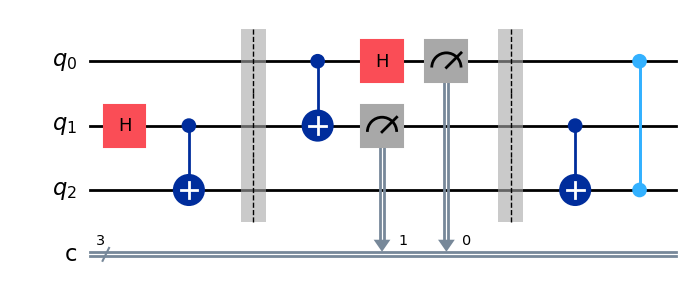

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Quantum Teleportation Circuit with 3 qubits and 3 classical bits for measurement
qc = QuantumCircuit(3, 3)

# Step 1: Create entanglement between qubit 1 and qubit 2
qc.h(1)  # Apply Hadamard on qubit 1 to create superposition
qc.cx(1, 2)  # Apply CNOT with qubit 1 as control and qubit 2 as target to create entanglement

# Step 2: Prepare the teleportation protocol
qc.barrier()  # Visual barrier for clarity
qc.cx(0, 1)  # Apply CNOT with qubit 0 as control and qubit 1 as target
qc.h(0)  # Apply Hadamard on qubit 0

# Step 3: Measure qubits 0 and 1
qc.measure([0, 1], [0, 1])

# Conditional operations based on the classical measurements
qc.barrier()  # Visual barrier for clarity
qc.cx(1, 2)  # Apply CNOT with qubit 1 as control and qubit 2 as target
qc.cz(0, 2)  # Apply CZ (Controlled-Z) with qubit 0 as control and qubit 2 as target

# Display the circuit
print(qc)
# or using a more visual approach:
circuit_drawer(qc, output='mpl')


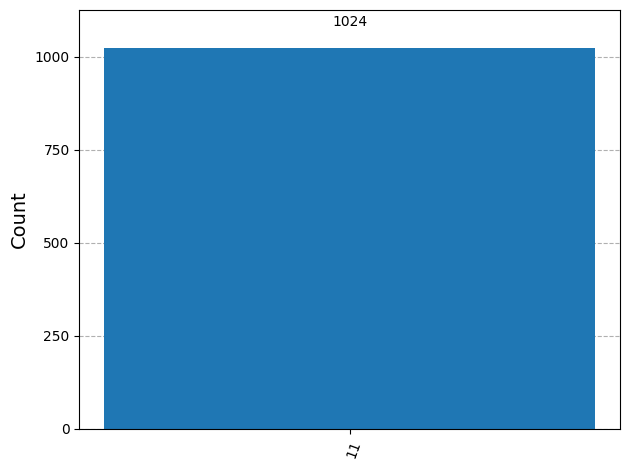

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import ZGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Initialize the quantum circuit with 2 qubits and 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to both qubits to create a superposition state
qc.h([0,1])

# Oracle for the state |11>
qc.cz(0, 1)  # Apply CZ gate as an oracle for marking state |11>

# Apply Grover's diffusion operator
qc.h([0,1])
qc.z([0,1])
qc.cz(0, 1)  # This acts as a Z gate controlled on both qubits, flipping the phase of |00>
qc.h([0,1])

# Measure the qubits
qc.measure([0,1], [0,1])

# Use the AerSimulator to simulate the circuit
simulator = AerSimulator() 

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

# Run the simulation with a specified number of shots
result = simulator.run(transpiled_circuit, shots=1024).result()

# Get the measurement results
counts = result.get_counts()

# Visualize the results with a histogram
plot_histogram(counts)


ModuleNotFoundError: No module named 'qiskit_ibm_runtime'